<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('weather_classification_data.csv')

In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [7]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
numerical

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

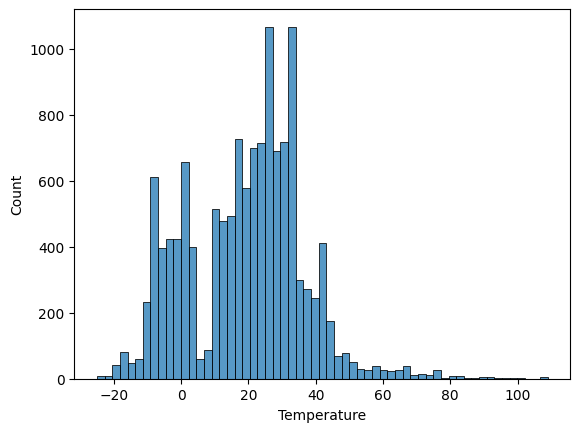

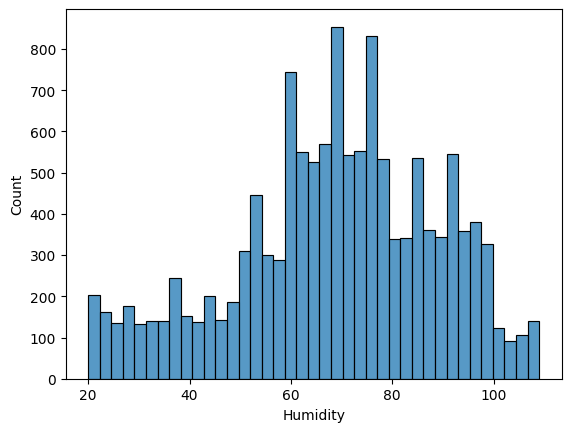

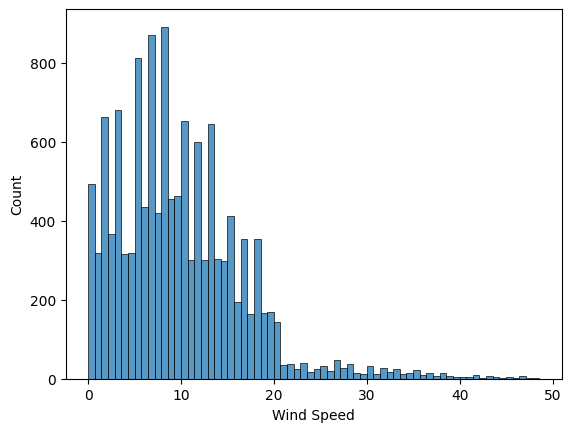

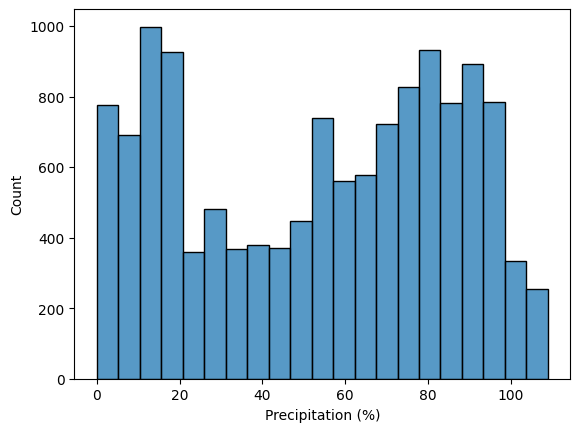

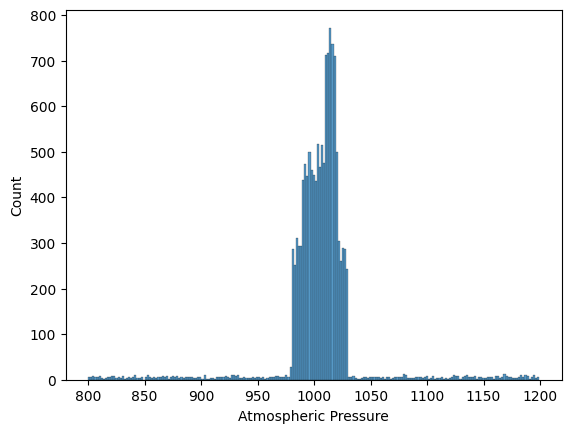

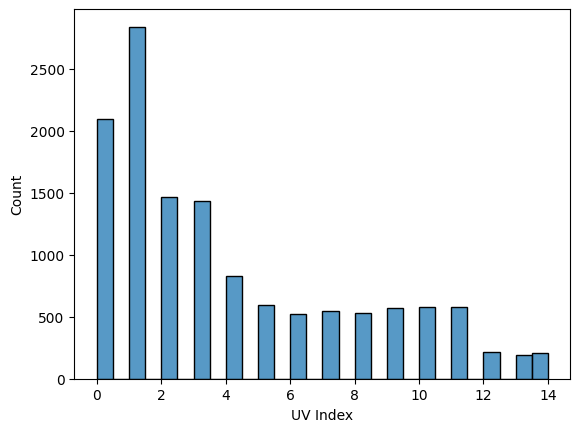

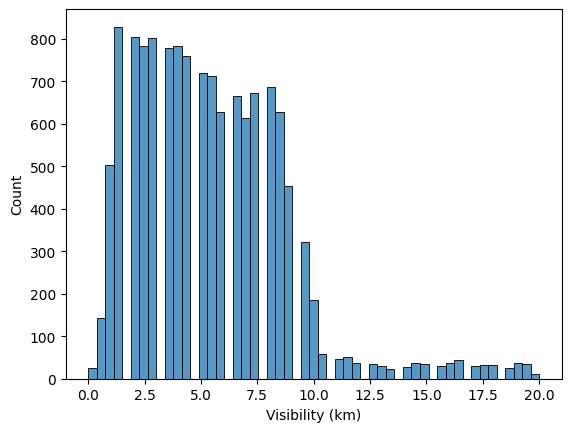

In [8]:
for i in numerical:
  sns.histplot(data=df,x=df[i])
  plt.show()


In [9]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [10]:
print(len(df.columns))
print(len(numerical))

11
7


In [11]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical

['Cloud Cover', 'Season', 'Location', 'Weather Type']

In [12]:
for col in categorical:
    dummies = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

In [13]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,14.0,73,9.5,82.0,1010.82,2,3.5,False,False,True,False,False,True,True,False,True,False,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,False,False,True,True,False,False,True,False,False,False,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,False,False,False,True,False,False,False,True,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,False,False,False,True,False,False,False,False,False,False,True
4,27.0,74,17.0,66.0,990.67,1,2.5,False,True,False,False,False,True,False,True,True,False,False


In [14]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [15]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,14.0,73,9.5,82.0,1010.82,2,3.5,0,0,1,0,0,1,1,0,1,0,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,0,1,1,0,0,1,0,0,0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,0,0,0,1,0,0,0,1,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,0,0,0,1,0,0,0,0,0,0,1
4,27.0,74,17.0,66.0,990.67,1,2.5,0,1,0,0,0,1,0,1,1,0,0


In [16]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Location_inland', 'Location_mountain',
       'Weather Type_Rainy', 'Weather Type_Snowy', 'Weather Type_Sunny'],
      dtype='object')

In [17]:
y = df[['Weather Type_Rainy', 'Weather Type_Snowy', 'Weather Type_Sunny']].idxmax(axis=1)
y = y.str.replace('Weather Type_', '')
x = df.drop(columns=['Weather Type_Rainy', 'Weather Type_Snowy', 'Weather Type_Sunny'])

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
xtrain.shape,ytrain.shape

((10560, 15), (10560,))

In [20]:
xtest.shape

(2640, 15)

In [ ]:
ypred =

In [24]:
from sklearn.preprocessing import MinMaxScaler
cols = xtrain.columns
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [25]:
xtrain = pd.DataFrame(xtrain, columns=[cols])
xtest = pd.DataFrame(xtest, columns=[cols])

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [28]:
ypredtest = logreg.predict(xtest)

In [29]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,ypredtest)

In [30]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypredtest)))

Model accuracy score: 0.9201


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypredtest, labels=logreg.classes_)


In [35]:
print(cm)

[[1253   59   29]
 [  33  619   12]
 [  65   13  557]]


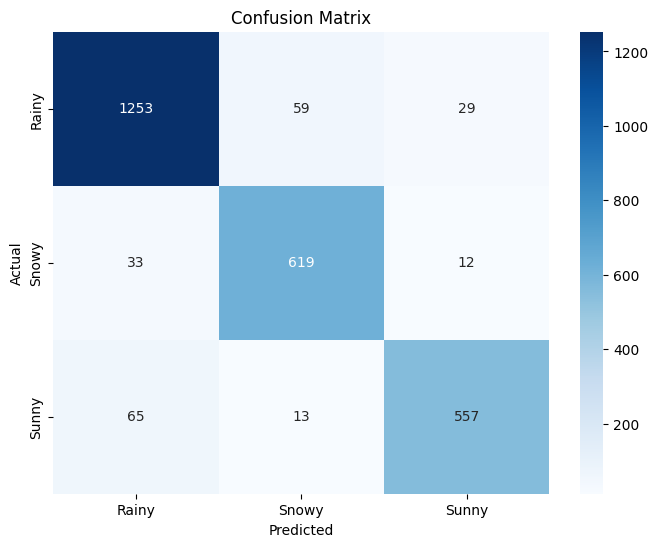

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()